<a href="https://colab.research.google.com/github/jmatrone/CEE609_Research_Project/blob/main/Torrey_Pines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# Attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [2]:
!pip install geopandas
!pip install earthpy
!pip install rtree
!pip install pygeos
!pip install mapclassify>=2.4.0
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.2 MB/s eta 0:00:00


In [3]:
Tpines = gpd.read_file('2006 Census clip.shp')

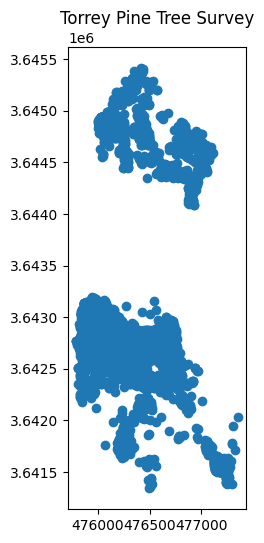

In [4]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
Tpines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Torrey Pine Tree Survey")
plt.show()

In [5]:
Tpines.head()

,Age,DBH__cm_,Height_cm_,Whorls,Trunks,Cones,Comment,SQRT_DBH,geometry
0,Sapling,0.0,110.0,7,1,No,None,0.0,POINT (476991.244 3644438.208)
1,Adult,2.1,190.0,12,1,Yes,+Cones,1.4,POINT (476992.026 3644436.86)
2,Sub-adult,1.9,225.0,14,1,No,None,1.4,POINT (476996.136 3644433.935)
3,Adult,5.4,0.0,12,1,Yes,None,2.3,POINT (476998.078 3644441.184)
4,Adult,27.3,0.0,0,1,Yes,None,5.2,POINT (477004.418 3644430.12)


In [6]:
Tpines2018 = gpd.read_file('Tierra census_clip.shp')

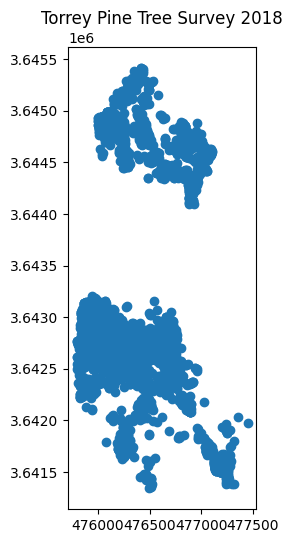

In [7]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
Tpines2018.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Torrey Pine Tree Survey 2018")
plt.show()

In [8]:
Tpines2018.head()

,OBJECTID_1,Age,DBH__cm_,Height_cm_,Whorls,Trunks,Cones,Comment,Health,GPS_Used,Azimuth,Distance,Date,DBH,rDBH,geometry
0,1,Adult,64.3,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476614.461 3644430.582 0)
1,2,Adult,61.6,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476610.757 3644438.886 0)
2,3,Adult,33.0,0.0,0,1,Yes,Prostrate only able to measure 1 upright trunk,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476598.128 3644423.615 0)
3,4,Adult,64.8,0.0,0,1,Yes,None,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476614.896 3644415.567 0)
4,5,Adult,56.0,0.0,0,2,Yes,23.0,Dead,SDSU Survey,0.0,0.0,0000/00/00,None,0.0,POINT Z (476612.47 3644423.313 0)


In [9]:
print("Tpines columns:", Tpines.columns)
print("Tpines2018 columns:", Tpines2018.columns)


Tpines columns: Index(['Age', 'DBH__cm_', 'Height_cm_', 'Whorls', 'Trunks', 'Cones', 'Comment',
       'SQRT_DBH', 'geometry'],
      dtype='object')
Tpines2018 columns: Index(['OBJECTID_1', 'Age', 'DBH__cm_', 'Height_cm_', 'Whorls', 'Trunks',
       'Cones', 'Comment', 'Health', 'GPS_Used', 'Azimuth', 'Distance', 'Date',
       'DBH', 'rDBH', 'geometry'],
      dtype='object')


In [10]:
# Calculate the total number of trees in each dataset
total_trees_2006 = len(Tpines)
total_trees_2018 = len(Tpines2018)

print(total_trees_2006)
print(total_trees_2018)
#2006-4672    2018-4398

# Calculate the difference in tree population
population_difference = total_trees_2018 - total_trees_2006

4672
4398


In [11]:
# Determine if there is an increase or decrease
if population_difference > 0:
    result = f"There is an increase of {population_difference} trees in 2018 compared to 2006."
elif population_difference < 0:
    result = f"There is a decrease of {abs(population_difference)} trees in 2018 compared to 2006."
else:
    result = "The tree population remained the same in 2018 compared to 2006."

print(result)
#There is a decrease of 274 trees in 2018 compared to 2006.

There is a decrease of 274 trees in 2018 compared to 2006.


In [12]:
!pip install rioxarray
import os
import rioxarray as rxr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.1 MB/s eta 0:00:00


In [13]:
pip install pyPRISMClimate


In [14]:
import pandas as pd

# Load the weather data into a DataFrame, skipping the first 10 rows
weather_data = pd.read_csv('/content/drive/MyDrive/PRISM_research_project.csv', skiprows=10)

# Display the first few rows of the DataFrame
print(weather_data.head())



      Date  ppt (inches)  tmean (degrees F)
0  2006-01          1.86               52.3
1  2006-02          1.66               54.6
2  2006-03          5.67               46.7
3  2006-04          3.11               53.0
4  2006-05          0.50               64.0


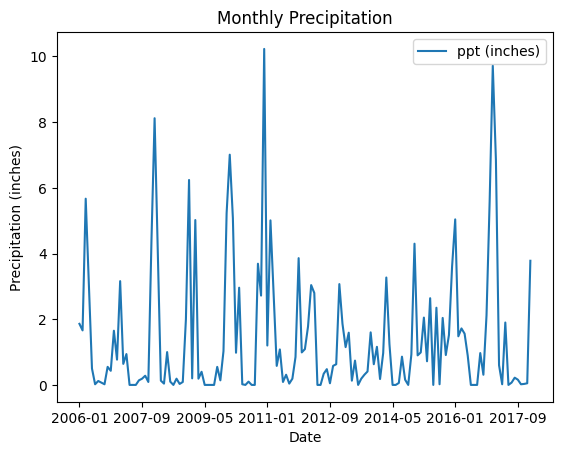

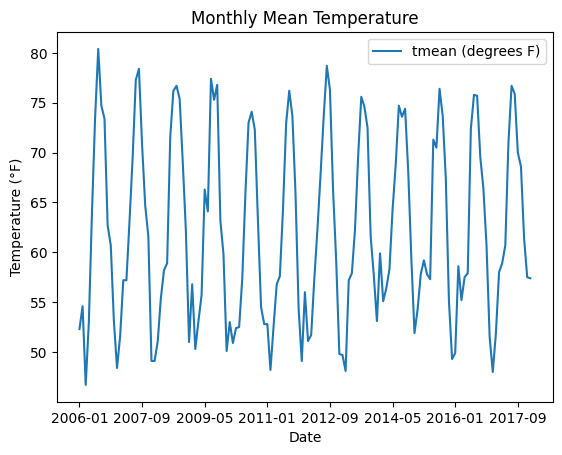

In [16]:
# Plot precipitation over time
weather_data.plot(x='Date', y='ppt (inches)', kind='line')
plt.title('Monthly Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

# Plot temperature over time
weather_data.plot(x='Date', y='tmean (degrees F)', kind='line')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()



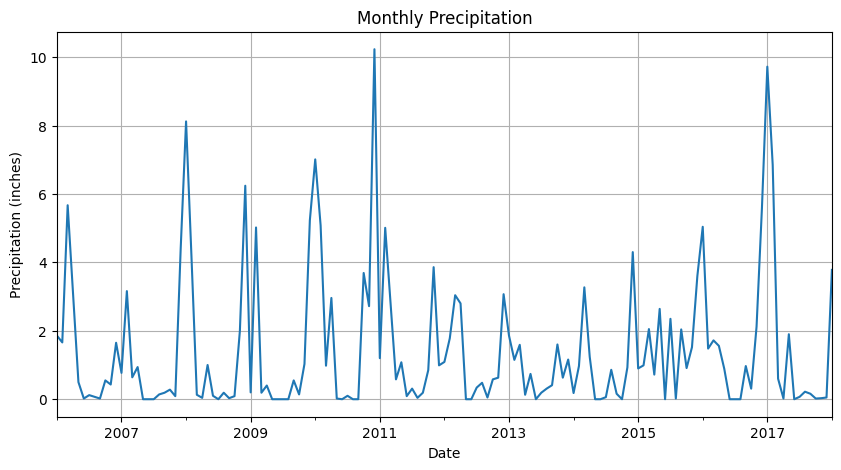

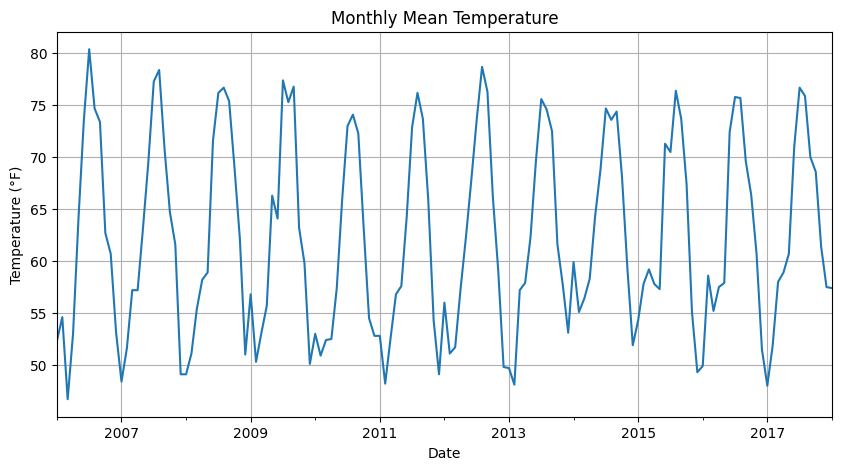

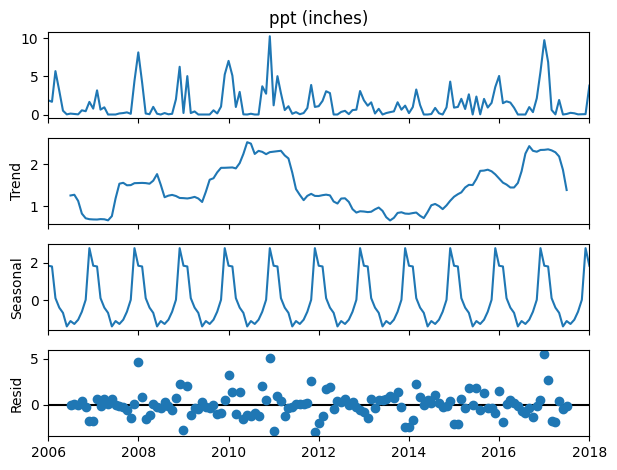

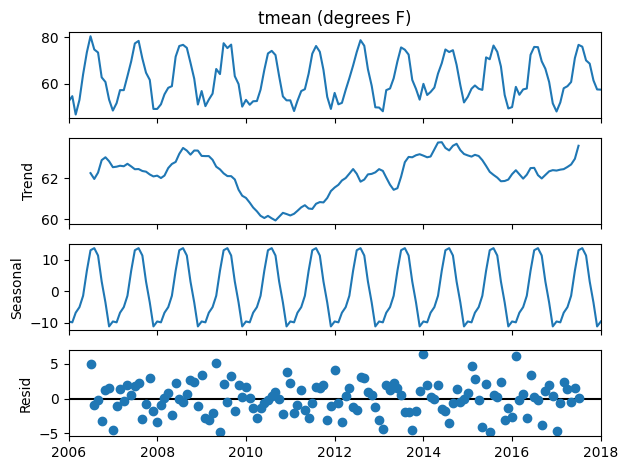

ADF Test for Precipitation:
ADF Statistic: -2.6733758451486063
p-value: 0.0787598044774156
Critical Values: {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}

ADF Test for Temperature:
ADF Statistic: -1.148805058962434
p-value: 0.6952220594205512
Critical Values: {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Convert 'Date' column to datetime format for proper time-series handling
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Set the 'Date' column as the index
weather_data.set_index('Date', inplace=True)

# Plot precipitation over time
plt.figure(figsize=(10, 5))
weather_data['ppt (inches)'].plot(title='Monthly Precipitation', xlabel='Date', ylabel='Precipitation (inches)')
plt.grid()
plt.show()

# Plot temperature over time
plt.figure(figsize=(10, 5))
weather_data['tmean (degrees F)'].plot(title='Monthly Mean Temperature', xlabel='Date', ylabel='Temperature (°F)')
plt.grid()
plt.show()

# Decompose the precipitation time series into trend, seasonal, and residual components
decompose_precip = seasonal_decompose(weather_data['ppt (inches)'], model='additive', period=12)
decompose_precip.plot()
plt.show()

# Decompose the temperature time series into trend, seasonal, and residual components
decompose_temp = seasonal_decompose(weather_data['tmean (degrees F)'], model='additive', period=12)
decompose_temp.plot()
plt.show()

# Perform the Augmented Dickey-Fuller test on precipitation to test for stationarity
result_precip = adfuller(weather_data['ppt (inches)'].dropna())
print("ADF Test for Precipitation:")
print(f"ADF Statistic: {result_precip[0]}")
print(f"p-value: {result_precip[1]}")
print(f"Critical Values: {result_precip[4]}")

# Perform the Augmented Dickey-Fuller test on temperature to test for stationarity
result_temp = adfuller(weather_data['tmean (degrees F)'].dropna())
print("\nADF Test for Temperature:")
print(f"ADF Statistic: {result_temp[0]}")
print(f"p-value: {result_temp[1]}")
print(f"Critical Values: {result_temp[4]}")


In [18]:
#this data below is for DEC, JAN, FEB of 2004,05,06 winters
#weather is directly from oregon prism at the torrey pine state park
#this is 3 winter years before the 2006 survey data

import os
import pandas as pd
import geopandas as gpd
# Attach to Google Drive
from google.colab import drive


drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

# Read CSV file with Pandas and skip the first ten rows
winter06climate = pd.read_csv('dec2005_feb2006_mintemp.csv', skiprows=10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
winter06climate.head()

,Date,tmin (degrees F)
0,2005-12-01,56.4
1,2005-12-02,54.4
2,2005-12-03,52.6
3,2005-12-04,51.5
4,2005-12-05,50.9


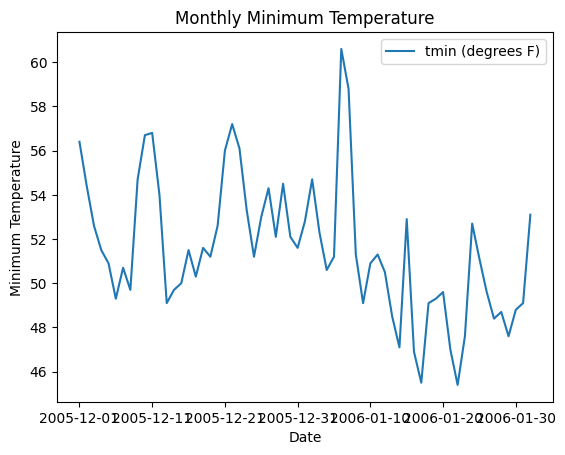

In [20]:
# Plot minimum temperature over time for winter 05-2006 temps
#dec, jan, feb
winter06climate.plot(x='Date', y='tmin (degrees F)', kind='line')
plt.title('Monthly Minimum Temperature')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature')
plt.show()


In [21]:
# Read CSV file with Pandas and skip the first ten rows for 04-05 winter temps
winter05climate = pd.read_csv('dec2004_feb2005_mintemp.csv', skiprows=10)

In [22]:
winter05climate.head()

,Date,tmin (degrees F)
0,2004-12-01,42.3
1,2004-12-02,42.1
2,2004-12-03,43.9
3,2004-12-04,45.8
4,2004-12-05,46.2


In [23]:
# Read CSV file with Pandas and skip the first ten rows for 03-04 winter temps
winter04climate = pd.read_csv('dec2003_feb2004_mintemp.csv', skiprows=10)

In [24]:
winter04climate.head()

,Date,tmin (degrees F)
0,2003-12-01,51.3
1,2003-12-02,50.1
2,2003-12-03,49.8
3,2003-12-04,48.0
4,2003-12-05,47.5


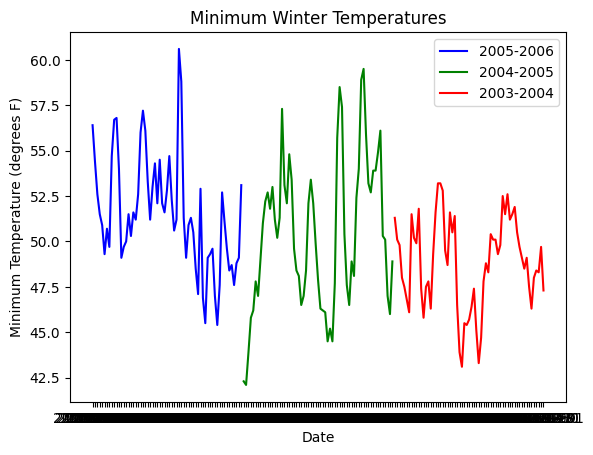

In [25]:
# Plot the minimum temperatures for each year
plt.plot(winter06climate['Date'], winter06climate['tmin (degrees F)'], label='2005-2006', color='blue')
plt.plot(winter05climate['Date'], winter05climate['tmin (degrees F)'], label='2004-2005', color='green')
plt.plot(winter04climate['Date'], winter04climate['tmin (degrees F)'], label='2003-2004', color='red')

# Add title and labels
plt.title('Minimum Winter Temperatures')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (degrees F)')
plt.legend()

# Show the plot
plt.show()

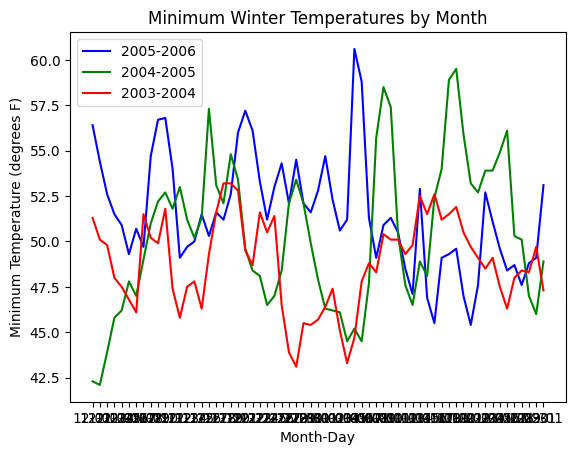

In [26]:
# Extract the month and day from the Date column to align the data based on similar months
winter06climate['MonthDay'] = pd.to_datetime(winter06climate['Date']).dt.strftime('%m-%d')
winter05climate['MonthDay'] = pd.to_datetime(winter05climate['Date']).dt.strftime('%m-%d')
winter04climate['MonthDay'] = pd.to_datetime(winter04climate['Date']).dt.strftime('%m-%d')

# Plot the minimum temperatures for each year based on DEC, JAN, FEB
plt.plot(winter06climate['MonthDay'], winter06climate['tmin (degrees F)'], label='2005-2006', color='blue')
plt.plot(winter05climate['MonthDay'], winter05climate['tmin (degrees F)'], label='2004-2005', color='green')
plt.plot(winter04climate['MonthDay'], winter04climate['tmin (degrees F)'], label='2003-2004', color='red')

# Add title and labels
plt.title('Minimum Winter Temperatures by Month')
plt.xlabel('Month-Day')
plt.ylabel('Minimum Temperature (degrees F)')
plt.legend()

# Show the plot
plt.show()

Below is the code for the 3 winters prior to the 2018 survey data

In [27]:

# Read CSV file with Pandas and skip the first ten rows for 2015-16 winter temps
winter16climate = pd.read_csv('dec2015_feb2016_mintemp.csv', skiprows=10)

In [28]:
winter16climate.head()

,Date,tmin (degrees F)
0,2016-12-01,50.9
1,2016-12-02,51.9
2,2016-12-03,50.9
3,2016-12-04,49.5
4,2016-12-05,52.0


In [29]:
# Read CSV file with Pandas and skip the first ten rows for 2016-17 winter temps
winter17climate = pd.read_csv('dec2016_feb2017_mintemp.csv', skiprows=10)
winter17climate.head()

,Date,tmin (degrees F)
0,2015-12-01,48.2
1,2015-12-02,50.3
2,2015-12-03,53.1
3,2015-12-04,53.8
4,2015-12-05,52.7


In [30]:
# Read CSV file with Pandas and skip the first ten rows for 2017-18 winter temps
winter18climate = pd.read_csv('dec2017_feb2018_mintemp.csv', skiprows=10)
winter18climate.head()

,Date,tmin (degrees F)
0,2017-12-01,53.3
1,2017-12-02,52.2
2,2017-12-03,52.5
3,2017-12-04,52.8
4,2017-12-05,48.5


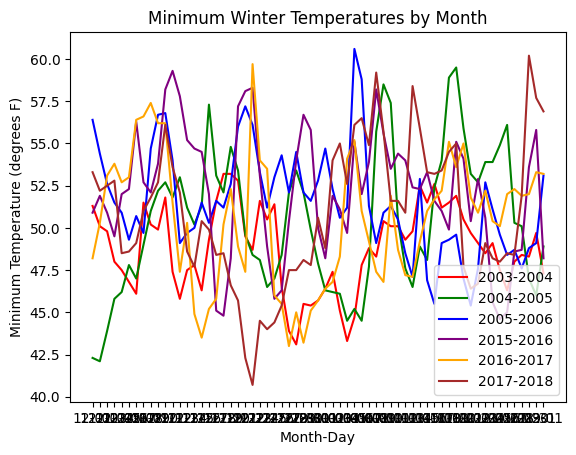

In [31]:
# Now plot all 6 years min temp data in one graph

winter06climate['MonthDay'] = pd.to_datetime(winter06climate['Date']).dt.strftime('%m-%d')
winter05climate['MonthDay'] = pd.to_datetime(winter05climate['Date']).dt.strftime('%m-%d')
winter04climate['MonthDay'] = pd.to_datetime(winter04climate['Date']).dt.strftime('%m-%d')
winter16climate['MonthDay'] = pd.to_datetime(winter16climate['Date']).dt.strftime('%m-%d')
winter17climate['MonthDay'] = pd.to_datetime(winter17climate['Date']).dt.strftime('%m-%d')
winter18climate['MonthDay'] = pd.to_datetime(winter18climate['Date']).dt.strftime('%m-%d')

# Plot the minimum temperatures for each year based on similar months
plt.plot(winter04climate['MonthDay'], winter04climate['tmin (degrees F)'], label='2003-2004', color='red')
plt.plot(winter05climate['MonthDay'], winter05climate['tmin (degrees F)'], label='2004-2005', color='green')
plt.plot(winter06climate['MonthDay'], winter06climate['tmin (degrees F)'], label='2005-2006', color='blue')
plt.plot(winter16climate['MonthDay'], winter16climate['tmin (degrees F)'], label='2015-2016', color='purple')
plt.plot(winter17climate['MonthDay'], winter17climate['tmin (degrees F)'], label='2016-2017', color='orange')
plt.plot(winter18climate['MonthDay'], winter18climate['tmin (degrees F)'], label='2017-2018', color='brown')

# Add title and labels
plt.title('Minimum Winter Temperatures by Month')
plt.xlabel('Month-Day')
plt.ylabel('Minimum Temperature (degrees F)')
plt.legend()

# Show the plot
plt.show()

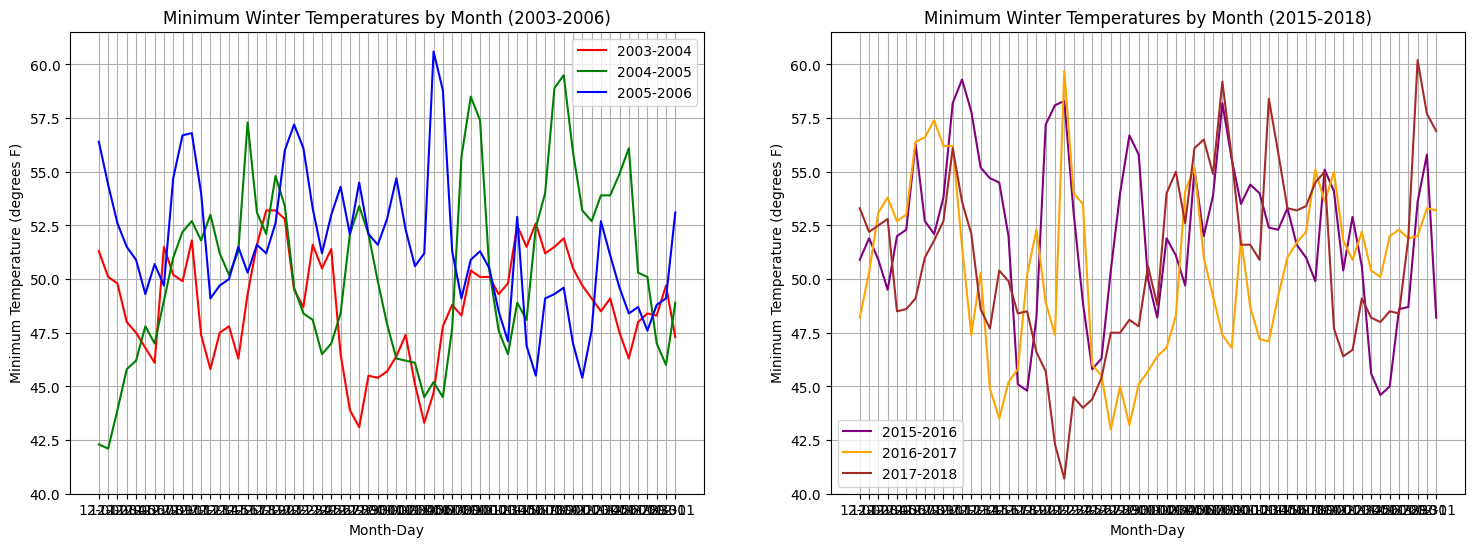

In [43]:
# Create two graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the minimum temperatures for 2003-2004, 2004-2005, and 2005-2006
axs[0].plot(winter04climate['MonthDay'], winter04climate['tmin (degrees F)'], label='2003-2004', color='red')
axs[0].plot(winter05climate['MonthDay'], winter05climate['tmin (degrees F)'], label='2004-2005', color='green')
axs[0].plot(winter06climate['MonthDay'], winter06climate['tmin (degrees F)'], label='2005-2006', color='blue')
axs[0].set_title('Minimum Winter Temperatures by Month (2003-2006)')
axs[0].set_xlabel('Month-Day')
axs[0].set_ylabel('Minimum Temperature (degrees F)')
axs[0].legend()
axs[0].grid(True)

# Plot the minimum temperatures for 2015-2016, 2016-2017, and 2017-2018
axs[1].plot(winter16climate['MonthDay'], winter16climate['tmin (degrees F)'], label='2015-2016', color='purple')
axs[1].plot(winter17climate['MonthDay'], winter17climate['tmin (degrees F)'], label='2016-2017', color='orange')
axs[1].plot(winter18climate['MonthDay'], winter18climate['tmin (degrees F)'], label='2017-2018', color='brown')
axs[1].set_title('Minimum Winter Temperatures by Month (2015-2018)')
axs[1].set_xlabel('Month-Day')
axs[1].set_ylabel('Minimum Temperature (degrees F)')
axs[1].legend()
axs[1].grid(True)

# Set consistent y-axis limits for both plots
for ax in axs:
    ax.set_ylim(40, axs[0].get_ylim()[1])  # Set lower limit to 40, keep upper limit dynamic
# Show the plots
plt.show()

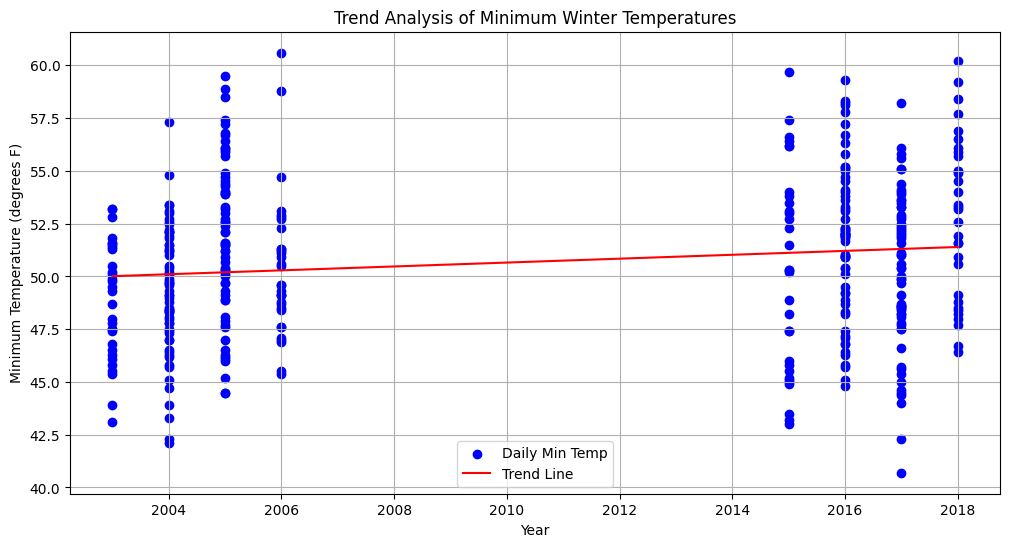

Trend line equation: y = 0.09x + -134.69
R-squared value: 0.02


In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Combine the data into a single DataFrame
all_data = pd.concat([winter04climate, winter05climate, winter06climate, winter16climate, winter17climate, winter18climate])

# Ensure the Date column is in datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Extract the year and month
all_data['Year'] = all_data['Date'].dt.year
all_data['Month'] = all_data['Date'].dt.month

# Perform linear regression to find the trend in minimum temperatures over the years
X = all_data['Year'].values.reshape(-1, 1)
y = all_data['tmin (degrees F)'].values
model = LinearRegression().fit(X, y)
trend = model.predict(X)

# Plot the data and the trend line
plt.figure(figsize=(12, 6))
plt.scatter(all_data['Year'], all_data['tmin (degrees F)'], color='blue', label='Daily Min Temp')
plt.plot(all_data['Year'], trend, color='red', label='Trend Line')
plt.title('Trend Analysis of Minimum Winter Temperatures')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature (degrees F)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the trend line equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"Trend line equation: y = {slope:.2f}x + {intercept:.2f}")

# Calculate the R-squared value to determine the goodness of fit
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.2f}")

In [34]:
# Read CSV file with Pandas and skip the first ten rows for 2017-18 percipitation
winter18percip = pd.read_csv('percip_dec17_feb18.csv', skiprows=10)
winter18percip.head()

,Date,ppt (inches)
0,2017-12-01,0.0
1,2017-12-02,0.0
2,2017-12-03,0.0
3,2017-12-04,0.0
4,2017-12-05,0.0


In [35]:
# Read CSV file with Pandas and skip the first ten rows for 2016-17 percipitation
winter17percip = pd.read_csv('percip_dec16_feb17.csv', skiprows=10)
winter17percip.head()

,Date,ppt (inches)
0,2016-12-01,0.0
1,2016-12-02,0.0
2,2016-12-03,0.0
3,2016-12-04,0.0
4,2016-12-05,0.0


In [36]:
# Read CSV file with Pandas and skip the first ten rows for 2015-16 percipitation
winter16percip = pd.read_csv('percip_dec15_feb16.csv', skiprows=10)
winter16percip.head()

,Date,ppt (inches)
0,2015-12-01,0.0
1,2015-12-02,0.0
2,2015-12-03,0.0
3,2015-12-04,0.0
4,2015-12-05,0.0


In [37]:
# Read CSV file with Pandas and skip the first ten rows for 2005-06 percipitation
winter06percip = pd.read_csv('percip_dec05_feb06.csv', skiprows=10)
winter06percip.head()

,Date,ppt (inches)
0,2005-12-01,0.00
1,2005-12-02,0.00
2,2005-12-03,0.02
3,2005-12-04,0.07
4,2005-12-05,0.00


In [38]:
# Read CSV file with Pandas and skip the first ten rows for 2004-05 percipitation
winter05percip = pd.read_csv('percip_dec04_feb05.csv', skiprows=10)
winter05percip.head()

,Date,ppt (inches)
0,2004-12-01,0.00
1,2004-12-02,0.00
2,2004-12-03,0.00
3,2004-12-04,0.00
4,2004-12-05,0.13


In [39]:
# Read CSV file with Pandas and skip the first ten rows for 2003-04 percipitation
winter04percip = pd.read_csv('percip_dec03_feb04.csv', skiprows=10)
winter04percip.head()

,Date,ppt (inches)
0,2003-12-01,0.0
1,2003-12-02,0.0
2,2003-12-03,0.0
3,2003-12-04,0.0
4,2003-12-05,0.0


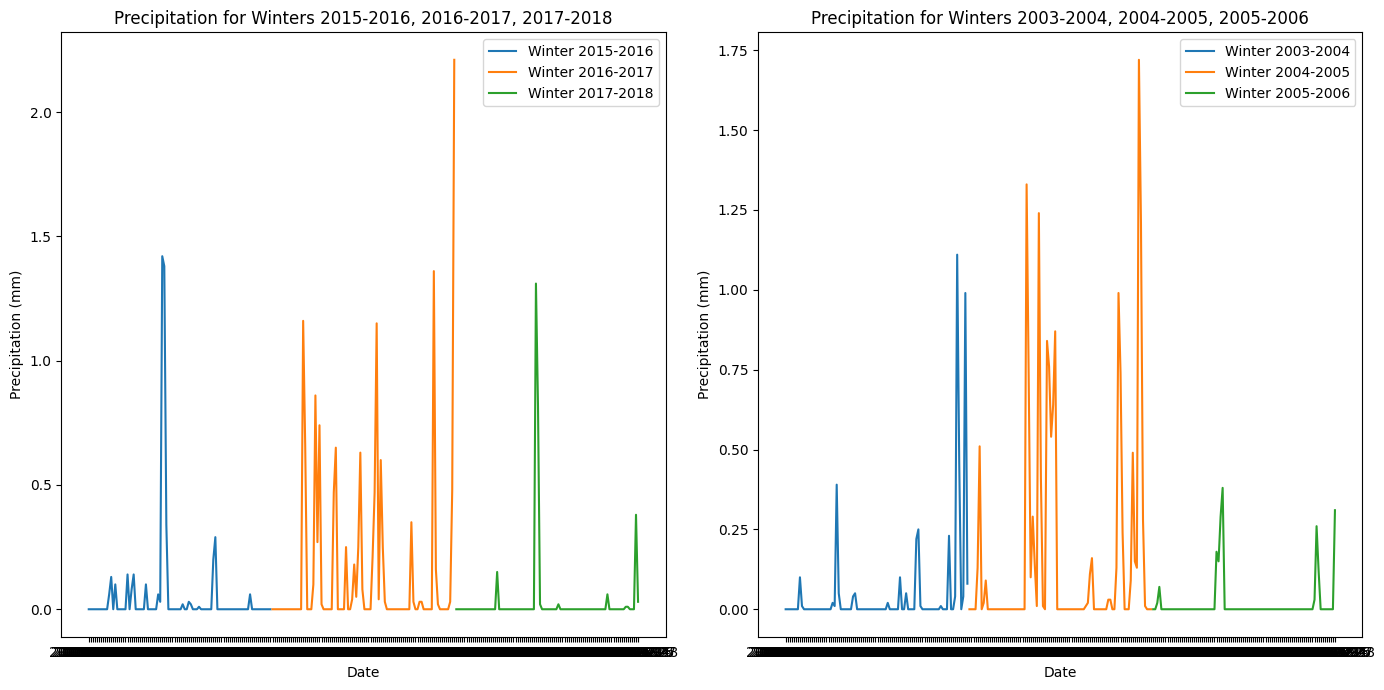

In [40]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first three years on the first subplot
ax1.plot(winter16percip['Date'], winter16percip['ppt (inches)'], label='Winter 2015-2016')
ax1.plot(winter17percip['Date'], winter17percip['ppt (inches)'], label='Winter 2016-2017')
ax1.plot(winter18percip['Date'], winter18percip['ppt (inches)'], label='Winter 2017-2018')
ax1.set_title('Precipitation for Winters 2015-2016, 2016-2017, 2017-2018')
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation (mm)')
ax1.legend()

# Plot the next three years on the second subplot
ax2.plot(winter04percip['Date'], winter04percip['ppt (inches)'], label='Winter 2003-2004')
ax2.plot(winter05percip['Date'], winter05percip['ppt (inches)'], label='Winter 2004-2005')
ax2.plot(winter06percip['Date'], winter06percip['ppt (inches)'], label='Winter 2005-2006')
ax2.set_title('Precipitation for Winters 2003-2004, 2004-2005, 2005-2006')
ax2.set_xlabel('Date')
ax2.set_ylabel('Precipitation (mm)')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

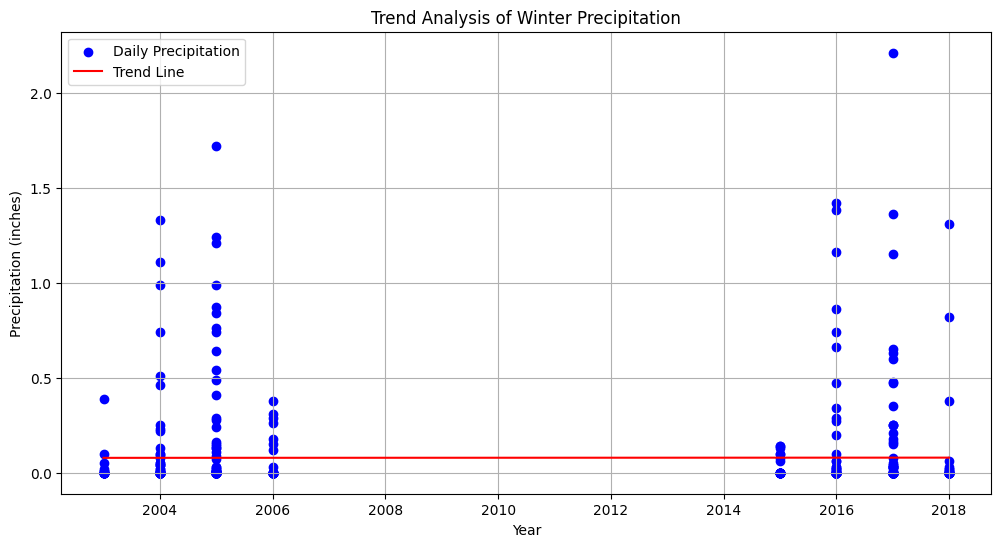

Trend line equation: y = 0.00x + -0.07
R-squared value: 0.00


In [41]:
# Combine the data into a single DataFrame
all_data = pd.concat([winter04percip, winter05percip, winter06percip, winter16percip, winter17percip, winter18percip])

# Ensure the Date column is in datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Extract the year and month
all_data['Year'] = all_data['Date'].dt.year
all_data['Month'] = all_data['Date'].dt.month

# Perform linear regression to find the trend in precipitation over the years
X = all_data['Year'].values.reshape(-1, 1)
y = all_data['ppt (inches)'].values
model = LinearRegression().fit(X, y)
trend = model.predict(X)

# Plot the data and the trend line
plt.figure(figsize=(12, 6))
plt.scatter(all_data['Year'], all_data['ppt (inches)'], color='blue', label='Daily Precipitation')
plt.plot(all_data['Year'], trend, color='red', label='Trend Line')
plt.title('Trend Analysis of Winter Precipitation')
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the trend line equation
slope = model.coef_[0]
intercept = model.intercept_
print(f"Trend line equation: y = {slope:.2f}x + {intercept:.2f}")

# Calculate the R-squared value to determine the goodness of fit
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.2f}")

### **Anova Code**

In [49]:
# Display the first few rows of the filtered DataFrames
print(winter06climate.head())
print(winter05climate.head())
print(winter04climate.head())
print(winter16climate.head())
print(winter17climate.head())
print(winter18climate.head())

         Date  tmin (degrees F) MonthDay
0  2005-12-01              56.4    12-01
1  2005-12-02              54.4    12-02
2  2005-12-03              52.6    12-03
3  2005-12-04              51.5    12-04
4  2005-12-05              50.9    12-05
         Date  tmin (degrees F) MonthDay
0  2004-12-01              42.3    12-01
1  2004-12-02              42.1    12-02
2  2004-12-03              43.9    12-03
3  2004-12-04              45.8    12-04
4  2004-12-05              46.2    12-05
         Date  tmin (degrees F) MonthDay
0  2003-12-01              51.3    12-01
1  2003-12-02              50.1    12-02
2  2003-12-03              49.8    12-03
3  2003-12-04              48.0    12-04
4  2003-12-05              47.5    12-05
         Date  tmin (degrees F) MonthDay
0  2016-12-01              50.9    12-01
1  2016-12-02              51.9    12-02
2  2016-12-03              50.9    12-03
3  2016-12-04              49.5    12-04
4  2016-12-05              52.0    12-05
         Date  t

In [52]:
import pandas as pd
from scipy import stats

# Combine the data into a single DataFrame for ANOVA
data = pd.DataFrame({
    'Temperature': pd.concat([winter04climate['tmin (degrees F)'], winter05climate['tmin (degrees F)'], winter06climate['tmin (degrees F)'],
                              winter16climate['tmin (degrees F)'], winter17climate['tmin (degrees F)'], winter18climate['tmin (degrees F)']]),
    'Year': ['2003-2004'] * len(winter04climate) + ['2004-2005'] * len(winter05climate) + ['2005-2006'] * len(winter06climate) +
            ['2015-2016'] * len(winter16climate) + ['2016-2017'] * len(winter17climate) + ['2017-2018'] * len(winter18climate)
})

# Perform ANOVA for 2003-2006 vs 2015-2018
anova_result = stats.f_oneway(
    data[data['Year'].isin(['2003-2004', '2004-2005', '2005-2006'])]['Temperature'],
    data[data['Year'].isin(['2015-2016', '2016-2017', '2017-2018'])]['Temperature']
)

print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
#Since the p-value is less than 0.05, we can reject the null hypothesis and
#conclude that there is a significant difference in the minimum temperatures between these two periods.

ANOVA result: F-statistic = 5.870639511195744, p-value = 0.01586703624750428


In [53]:
#means for temp
import pandas as pd

# Combine the data into a single DataFrame for calculating means
data = pd.DataFrame({
    'Temperature': pd.concat([winter04climate['tmin (degrees F)'], winter05climate['tmin (degrees F)'], winter06climate['tmin (degrees F)'],
                              winter16climate['tmin (degrees F)'], winter17climate['tmin (degrees F)'], winter18climate['tmin (degrees F)']]),
    'Year': ['2003-2004'] * len(winter04climate) + ['2004-2005'] * len(winter05climate) + ['2005-2006'] * len(winter06climate) +
            ['2015-2016'] * len(winter16climate) + ['2016-2017'] * len(winter17climate) + ['2017-2018'] * len(winter18climate)
})

# Calculate the means for each year
means = data.groupby('Year')['Temperature'].mean()

print("Means for each year:")
print(means)

Means for each year:
Year
2003-2004    48.806349
2004-2005    50.363492
2005-2006    51.542857
2015-2016    52.192063
2016-2017    50.476190
2017-2018    50.844444
Name: Temperature, dtype: float64


Precipitation

Means for each year (Precipitation):
Year
2003-2004    0.047556
2004-2005    0.169000
2005-2006    0.020111
2015-2016    0.051222
2016-2017    0.154000
2017-2018    0.031222
Name: Precipitation, dtype: float64
ANOVA result (Precipitation): F-statistic = 1.1794156972955145e-05, p-value = 0.9972611335987356


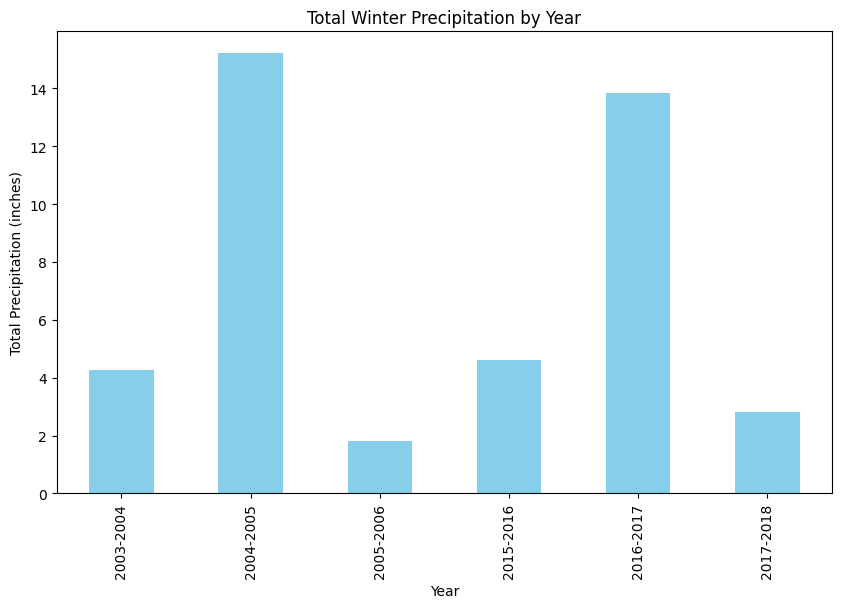

In [55]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Combine the precipitation data into a single DataFrame for calculating means and p-values
data_precip = pd.DataFrame({
    'Precipitation': pd.concat([winter04percip['ppt (inches)'], winter05percip['ppt (inches)'], winter06percip['ppt (inches)'],
                                winter16percip['ppt (inches)'], winter17percip['ppt (inches)'], winter18percip['ppt (inches)']]),
    'Year': ['2003-2004'] * len(winter04percip) + ['2004-2005'] * len(winter05percip) + ['2005-2006'] * len(winter06percip) +
            ['2015-2016'] * len(winter16percip) + ['2016-2017'] * len(winter17percip) + ['2017-2018'] * len(winter18percip)
})

# Calculate the means for each year
means_precip = data_precip.groupby('Year')['Precipitation'].mean()

print("Means for each year (Precipitation):")
print(means_precip)

# Perform ANOVA for 2003-2006 vs 2015-2018
anova_result_precip = stats.f_oneway(
    data_precip[data_precip['Year'].isin(['2003-2004', '2004-2005', '2005-2006'])]['Precipitation'],
    data_precip[data_precip['Year'].isin(['2015-2016', '2016-2017', '2017-2018'])]['Precipitation']
)

print(f"ANOVA result (Precipitation): F-statistic = {anova_result_precip.statistic}, p-value = {anova_result_precip.pvalue}")

# Calculate the total precipitation for each year
total_precip = data_precip.groupby('Year')['Precipitation'].sum()

# Create a bar graph to show winter total precipitation
plt.figure(figsize=(10, 6))
total_precip.plot(kind='bar', color='skyblue')
plt.title('Total Winter Precipitation by Year')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.show()
# The p-value is great than 0.05 which shows no statistically significant difference
# in the total winter precipitation between the years 2003-2006 and 2015-2018

In [57]:
# Calculate the total precipitation for each year
total_precip = data_precip.groupby('Year')['Precipitation'].sum()

# Calculate the total precipitation for the grouping of 2003-2006 and 2015-2018
total_precip_grouped = {
    '2003-2006': data_precip[data_precip['Year'].isin(['2003-2004', '2004-2005', '2005-2006'])]['Precipitation'].sum(),
    '2015-2018': data_precip[data_precip['Year'].isin(['2015-2016', '2016-2017', '2017-2018'])]['Precipitation'].sum()
}
print("Total Precipitation for 2003-2006:", total_precip_grouped['2003-2006'])
print("Total Precipitation for 2015-2018:", total_precip_grouped['2015-2018'])


Total Precipitation for 2003-2006: 21.300000000000004
Total Precipitation for 2015-2018: 21.279999999999998
